In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels prophet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install openpyxl

In [4]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


1. Data Cleaning & Preparation

In [5]:
df.shape

(541909, 8)

In [6]:
df.size

4335272

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

 Convert date column to DateTime format

In [10]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [13]:
df = df.sort_values('InvoiceDate')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


In [15]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [16]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Sales               0
dtype: int64

In [18]:
df['Description'] = df['Description'].fillna('Unknown')

In [19]:
df = df.drop(columns=['CustomerID'])

In [20]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
Sales          0
dtype: int64

In [21]:
daily_sales = df.resample('D', on='InvoiceDate')['Sales'].sum()
daily_sales.head()

InvoiceDate
2010-12-01    58635.56
2010-12-02    46207.28
2010-12-03    45620.46
2010-12-04        0.00
2010-12-05    31383.95
Freq: D, Name: Sales, dtype: float64

In [22]:
weekly_sales = df.resample('W', on='InvoiceDate')['Sales'].sum()
weekly_sales.head()

InvoiceDate
2010-12-05    181847.25
2010-12-12    270287.03
2010-12-19    207052.17
2010-12-26     89770.57
2011-01-02         0.00
Freq: W-SUN, Name: Sales, dtype: float64

In [24]:
monthly_sales = df.resample('ME', on='InvoiceDate')['Sales'].sum()
monthly_sales.head()

InvoiceDate
2010-12-31    748957.020
2011-01-31    560000.260
2011-02-28    498062.650
2011-03-31    683267.080
2011-04-30    493207.121
Freq: ME, Name: Sales, dtype: float64

In [26]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [27]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [28]:
df = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

In [29]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,Sales
count,487453.000000,487453,487453.000000,487453.000000
mean,6.224241,2011-07-05 02:02:11.065805056,3.132388,10.474428
min,1.000000,2010-12-01 08:26:00,0.001000,0.001000
25%,1.000000,2011-03-28 11:49:00,1.250000,3.360000
50%,3.000000,2011-07-20 13:53:00,2.080000,8.300000
75%,8.000000,2011-10-19 16:59:00,4.130000,15.900000
max,900.000000,2011-12-09 12:50:00,38.260000,38.520000
std,8.917853,NaN,3.252649,8.315532


2. Exploratory Data Analysis (EDA)

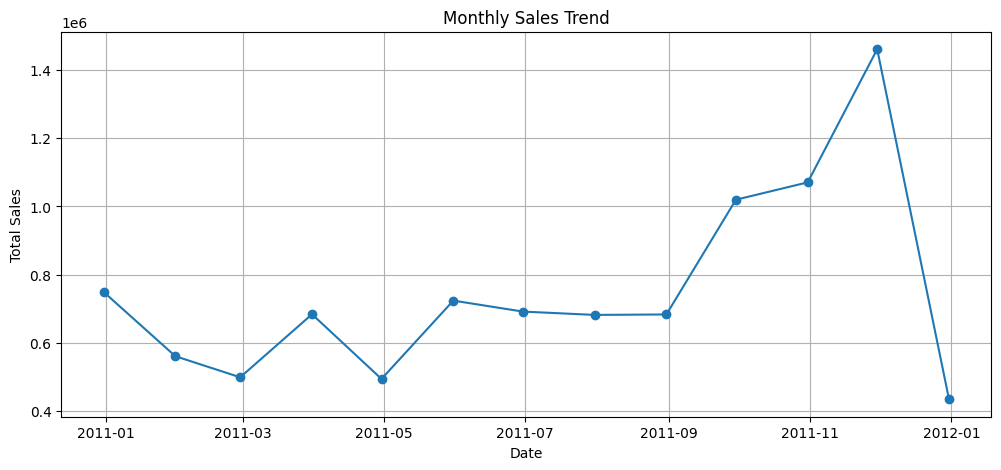

In [30]:
plt.figure(figsize=(12,5))
plt.plot(monthly_sales, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [31]:
df['Month'] = df['InvoiceDate'].dt.month

In [32]:
monthly_seasonality = df.groupby('Month')['Sales'].mean()
monthly_seasonality

Month
1      9.828937
2     10.816969
3     10.668587
4     10.726055
5     11.506067
6     10.606684
7      9.906553
8     11.240243
9     11.412923
10    10.612434
11     9.670372
12     9.973559
Name: Sales, dtype: float64

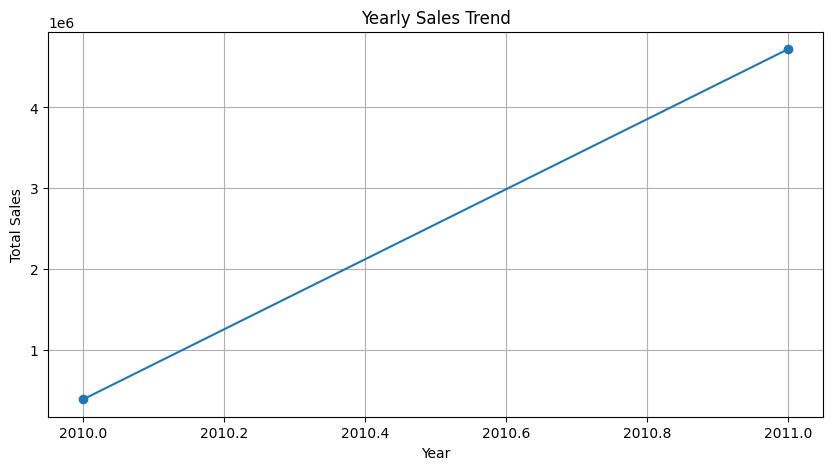

In [33]:
df['Year'] = df['InvoiceDate'].dt.year

yearly_sales = df.groupby('Year')['Sales'].sum()

plt.figure(figsize=(10,5))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [34]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

In [35]:
df['DayType'] = df['DayOfWeek'].apply(
    lambda x: 'Holiday' if x >= 5 else 'Normal'
)

In [36]:
holiday_comparison = df.groupby('DayType')['Sales'].mean()
holiday_comparison

DayType
Holiday     8.706868
Normal     10.726389
Name: Sales, dtype: float64

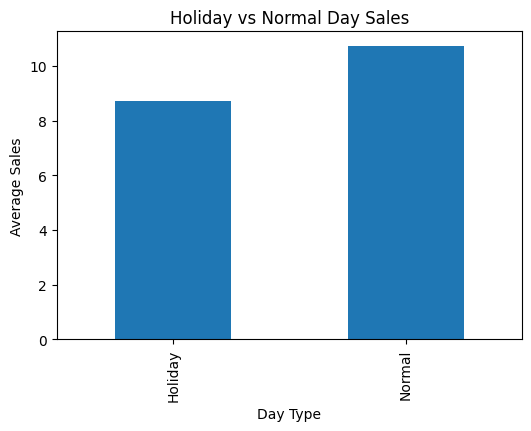

In [37]:
holiday_comparison.plot(kind='bar', figsize=(6,4), title='Holiday vs Normal Day Sales')
plt.xlabel("Day Type")
plt.ylabel("Average Sales")
plt.show()

In [38]:
category_sales = (
    df.groupby('StockCode')['Sales']
    .sum()
    .sort_values(ascending=False)
)

In [39]:
top_10_categories = category_sales.head(10)
top_10_categories

StockCode
85123A    29391.56
22423     25784.37
85099B    22525.00
84879     18875.50
22720     18651.91
22457     18608.51
47566     18595.12
20725     17898.28
22960     16580.97
23298     15826.22
Name: Sales, dtype: float64

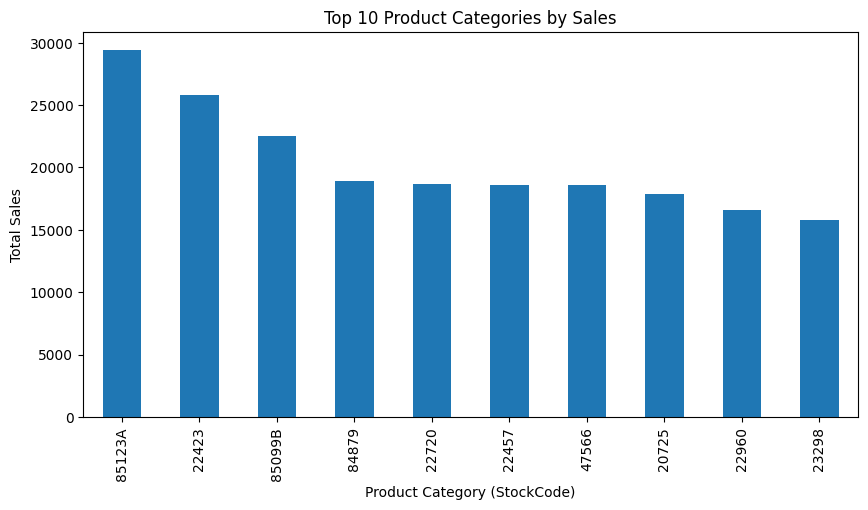

In [40]:
top_10_categories.plot(
    kind='bar',
    figsize=(10,5),
    title='Top 10 Product Categories by Sales'
)
plt.xlabel("Product Category (StockCode)")
plt.ylabel("Total Sales")
plt.show()

In [41]:
corr_data = df[['Quantity', 'UnitPrice', 'Sales']]

In [42]:
correlation_matrix = corr_data.corr()
correlation_matrix

,Quantity,UnitPrice,Sales
Quantity,1.000000,-0.311044,0.397752
UnitPrice,-0.311044,1.000000,0.308432
Sales,0.397752,0.308432,1.000000


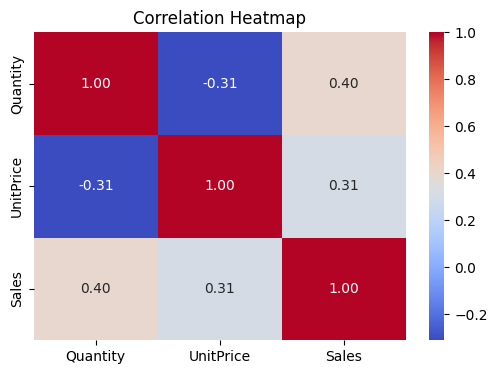

In [43]:
plt.figure(figsize=(6,4))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()

3. Forecasting Model Development

In [46]:
prophet_df = monthly_sales.reset_index()
prophet_df.columns = ['ds', 'y']

prophet_df.head()

,ds,y
0,2010-12-31,748957.020
1,2011-01-31,560000.260
2,2011-02-28,498062.650
3,2011-03-31,683267.080
4,2011-04-30,493207.121


In [47]:
from prophet import Prophet

model = Prophet()
model.fit(prophet_df)

Importing plotly failed. Interactive plots will not work.
14:02:37 - cmdstanpy - INFO - Chain [1] start processing
14:02:37 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
future = model.make_future_dataframe(periods=6, freq='ME')

In [50]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
14,2012-02-29,1.024312e+06,725576.167989,1.341126e+06
15,2012-03-31,1.059295e+06,769085.779992,1.382252e+06
16,2012-04-30,1.093149e+06,790905.758587,1.391019e+06
17,2012-05-31,1.128132e+06,834701.116517,1.442542e+06
18,2012-06-30,1.161987e+06,852858.629252,1.483432e+06


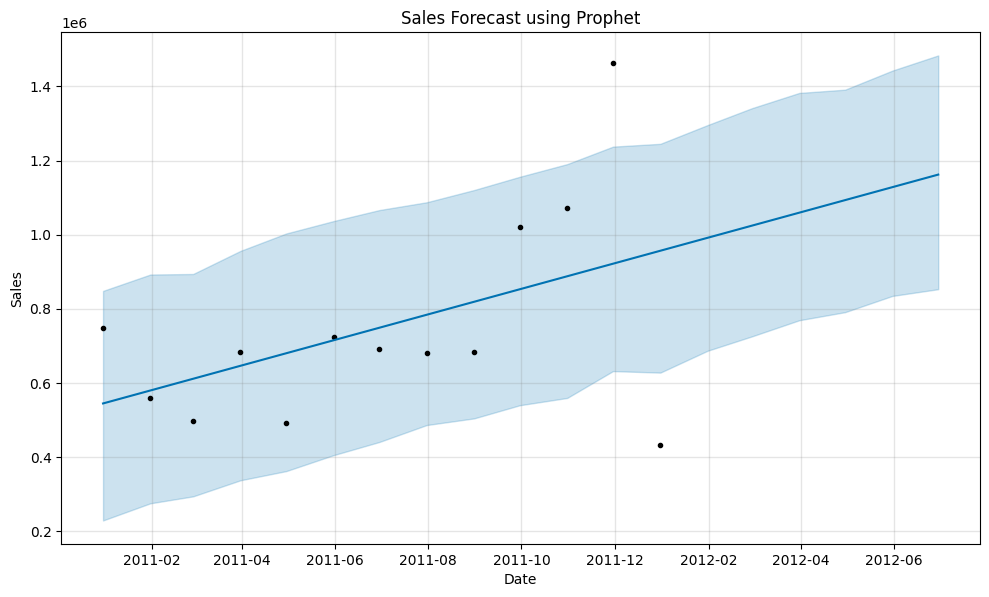

In [52]:
forecast_fig = model.plot(forecast)
plt.title("Sales Forecast using Prophet")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

train = prophet_df[:-3]
test = prophet_df[-3:]

In [55]:
model_eval = Prophet()
model_eval.fit(train)

14:05:40 - cmdstanpy - INFO - Chain [1] start processing
14:05:40 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
future_eval = model_eval.make_future_dataframe(periods=3, freq='ME')
forecast_eval = model_eval.predict(future_eval)

pred = forecast_eval[['ds', 'yhat']].tail(3)['yhat'].values
actual = test['y'].values

In [58]:
mae = mean_absolute_error(actual, pred)

In [59]:
rmse = np.sqrt(mean_squared_error(actual, pred))

In [60]:
mape = np.mean(np.abs((actual - pred) / actual)) * 100

In [61]:
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")

MAE  : 432544.84
RMSE : 457545.73
MAPE : 55.93%


4. Business Insights Layer

In [62]:
df['Day'] = df['InvoiceDate'].dt.day

month_end_sales = df[df['Day'] >= 25]['Sales'].mean()
normal_sales = df[df['Day'] < 25]['Sales'].mean()

month_end_sales, normal_sales

(np.float64(10.493902565215405), np.float64(10.470164144767278))

In [63]:
category_sales = df.groupby('StockCode')['Sales'].sum()
low_performing = category_sales.sort_values().head(10)
low_performing

StockCode
PADS      0.003
84227     0.420
51014c    0.830
21268     0.840
90084     0.850
84206B    0.950
84201C    0.950
84990     1.100
21009     1.250
84743C    1.250
Name: Sales, dtype: float64

In [65]:
future_30 = model.make_future_dataframe(periods=1, freq='ME')
forecast_30 = model.predict(future_30)
forecast_30[['ds','yhat']].tail(1)

,ds,yhat
13,2012-01-31,991585.649478


In [66]:
future_60 = model.make_future_dataframe(periods=2, freq='ME')
forecast_60 = model.predict(future_60)
forecast_60[['ds','yhat']].tail(2)

,ds,yhat
13,2012-01-31,9.915856e+05
14,2012-02-29,1.024312e+06


In [68]:
forecast = model.predict(future)

In [69]:
forecast_file = forecast[['ds', 'yhat']]
forecast_file.tail()

,ds,yhat
14,2012-02-29,1.024312e+06
15,2012-03-31,1.059295e+06
16,2012-04-30,1.093149e+06
17,2012-05-31,1.128132e+06
18,2012-06-30,1.161987e+06


In [70]:
forecast_file.to_excel("sales_forecast_60_days.xlsx", index=False)

In [71]:
df.to_excel("cleaned_sales_data.xlsx", index=False)

print("cleaned_sales_data.xlsx file created successfully!")

cleaned_sales_data.xlsx file created successfully!


In [74]:
import pickle

pickle.dump(model, open("sales_model.pkl", "wb"))
print("Sales model saved successfully")

Sales model saved successfully


In [83]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# ---------------- Page Configuration ----------------
st.set_page_config(
    page_title="Sales Forecasting System",
    page_icon="📈",
    layout="centered"
)

# ---------------- Custom Styling ----------------
st.markdown("""
<style>
.main {
    background-color: #f7f9fc;
}
.title {
    font-size: 36px;
    font-weight: 700;
    color: #2e5e50;
    text-align: center;
}
.subtitle {
    font-size: 18px;
    color: #555;
    text-align: center;
    margin-bottom: 30px;
}
</style>
""", unsafe_allow_html=True)

# ---------------- Load Model ----------------
model = pickle.load(open("sales_model.pkl", "rb"))

# ---------------- Title ----------------
st.markdown("<div class='title'>Sales Forecasting System</div>", unsafe_allow_html=True)
st.markdown("<div class='subtitle'>Machine Learning Based Demand Prediction</div>", unsafe_allow_html=True)
st.markdown("---")

# ---------------- USER INPUT ----------------
st.subheader("📥 User Input")

days = st.number_input(
    "Enter number of days to forecast",
    min_value=1,
    max_value=365,
    value=60
)

predict_btn = st.button("🔮 Predict Sales")

# ---------------- PREDICTION ----------------
if predict_btn:
    # Create future dataframe
    future = model.make_future_dataframe(periods=days)

    # Predict
    forecast = model.predict(future)

    # Get only future predictions
    forecast_future = forecast[['ds', 'yhat']].tail(days)

    st.success("Prediction completed successfully!")

    # ---------------- Plot ----------------
    st.subheader("📈 Forecasted Sales")

    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(forecast_future['ds'], forecast_future['yhat'], marker='o')
    ax.set_xlabel("Date")
    ax.set_ylabel("Forecasted Sales")
    ax.set_title(f"Sales Forecast for Next {days} Days")
    ax.grid(True)

    st.pyplot(fig)

    # ---------------- Table ----------------
    st.subheader("📊 Forecasted Values")
    st.dataframe(forecast_future)

# ---------------- Footer ----------------
st.markdown("---")
st.write("📌 Deployed using Streamlit | ML Model: Prophet")


Overwriting app.py
